## Creating a Vocab

In [0]:
!ls

drive  sample_data


In [0]:
import json 

In [0]:
descriptions = None
Path = "/content/drive/My Drive/Machine Learning/ImageCaptioningBot/"
with open(Path + "Descriptions.txt",'r') as f:
    descriptions = f.read()

In [52]:
type(descriptions)

str

In [0]:
json_acceptable_string = descriptions.replace("'","\"")
descriptions = json.loads(json_acceptable_string)

In [54]:
type(descriptions)

dict

In [55]:
descriptions["1000268201_693b08cb0e"]

['child in pink dress is climbing up set of stairs in an entry way',
 'girl going into wooden building',
 'little girl climbing into wooden playhouse',
 'little girl climbing the stairs to her playhouse',
 'little girl in pink dress going into wooden cabin']

In [56]:
vocab = set() 
for keys in descriptions.keys():
    [vocab.update(sentence.split()) for sentence in descriptions[keys]]

print("Vocab Size : %d"%(len(vocab)))

Vocab Size : 8424


In [57]:
Total_words = []
for key in descriptions.keys():
    [Total_words.append(i) for sentence in descriptions[key] for i in sentence.split()]
    
print("Total Words :%d"%(len(Total_words)))   

Total Words :373837


In [0]:
import collections
# We use the Counter data structure
counter = collections.Counter(Total_words)
freq_count = dict(counter)

In [59]:
freq_count

{'child': 1545,
 'in': 18987,
 'pink': 739,
 'dress': 348,
 'is': 9345,
 'climbing': 507,
 'up': 1302,
 'set': 109,
 'of': 6723,
 'stairs': 109,
 'an': 2432,
 'entry': 1,
 'way': 53,
 'girl': 3328,
 'going': 149,
 'into': 1074,
 'wooden': 284,
 'building': 511,
 'little': 1768,
 'playhouse': 6,
 'the': 18420,
 'to': 3176,
 'her': 1178,
 'cabin': 4,
 'black': 3848,
 'dog': 8138,
 'and': 8863,
 'spotted': 38,
 'are': 3505,
 'fighting': 133,
 'tri': 14,
 'colored': 221,
 'playing': 2008,
 'with': 7765,
 'each': 430,
 'other': 773,
 'on': 10746,
 'road': 398,
 'white': 3959,
 'brown': 2578,
 'spots': 29,
 'staring': 57,
 'at': 2916,
 'street': 944,
 'two': 5643,
 'dogs': 2125,
 'different': 46,
 'breeds': 5,
 'looking': 744,
 'pavement': 48,
 'moving': 41,
 'toward': 146,
 'covered': 372,
 'paint': 62,
 'sits': 577,
 'front': 1386,
 'painted': 64,
 'rainbow': 22,
 'hands': 246,
 'bowl': 30,
 'sitting': 1368,
 'large': 1237,
 'small': 1278,
 'grass': 1622,
 'plays': 526,
 'fingerpaints': 3,

In [60]:
len(freq_count.keys())

8424

In [0]:
sorted_freq_count = sorted(freq_count.items(),reverse=True,key=lambda x:x[1])
# Filter
threshold = 10 
sorted_freq_count = [x for x in sorted_freq_count if x[1]>threshold]
total_words = [x[0] for x in sorted_freq_count]

In [62]:
len(total_words)

1845

In [63]:
total_words

['in',
 'the',
 'on',
 'is',
 'and',
 'dog',
 'with',
 'man',
 'of',
 'two',
 'white',
 'black',
 'boy',
 'are',
 'woman',
 'girl',
 'to',
 'wearing',
 'at',
 'people',
 'water',
 'red',
 'young',
 'brown',
 'an',
 'his',
 'blue',
 'dogs',
 'running',
 'through',
 'playing',
 'while',
 'shirt',
 'down',
 'standing',
 'ball',
 'little',
 'grass',
 'snow',
 'child',
 'person',
 'jumping',
 'over',
 'three',
 'front',
 'sitting',
 'holding',
 'up',
 'field',
 'small',
 'by',
 'large',
 'green',
 'one',
 'group',
 'yellow',
 'her',
 'walking',
 'children',
 'men',
 'into',
 'air',
 'beach',
 'near',
 'mouth',
 'jumps',
 'another',
 'for',
 'street',
 'runs',
 'its',
 'from',
 'riding',
 'stands',
 'as',
 'bike',
 'girls',
 'outside',
 'other',
 'off',
 'out',
 'rock',
 'next',
 'play',
 'orange',
 'looking',
 'pink',
 'player',
 'camera',
 'their',
 'pool',
 'hat',
 'jacket',
 'boys',
 'women',
 'around',
 'behind',
 'some',
 'background',
 'dirt',
 'toy',
 'soccer',
 'sits',
 'dressed',
 

## Prepare Train/Test Data

In [0]:
def readTextFile(path):
    with open(path) as f:
        captions = f.read()
    return captions

In [0]:
train_file_data = readTextFile(Path + "Data/Flickr_8k.trainImages.txt")
test_file_data = readTextFile(Path + "Data/Flickr_8k.testImages.txt")

In [0]:
train = [row.split(".")[0] for row in train_file_data.split("\n")[:-1]] 
test = [row.split(".")[0] for row in test_file_data.split("\n")[:-1]]

In [67]:
train

['2513260012_03d33305cf',
 '2903617548_d3e38d7f88',
 '3338291921_fe7ae0c8f8',
 '488416045_1c6d903fe0',
 '2644326817_8f45080b87',
 '218342358_1755a9cce1',
 '2501968935_02f2cd8079',
 '2699342860_5288e203ea',
 '2638369467_8fc251595b',
 '2926786902_815a99a154',
 '2851304910_b5721199bc',
 '3423802527_94bd2b23b0',
 '3356369156_074750c6cc',
 '2294598473_40637b5c04',
 '1191338263_a4fa073154',
 '2380765956_6313d8cae3',
 '3197891333_b1b0fd1702',
 '3119887967_271a097464',
 '2276499757_b44dc6f8ce',
 '2506892928_7e79bec613',
 '2187222896_c206d63396',
 '2826769554_85c90864c9',
 '3097196395_ec06075389',
 '3603116579_4a28a932e2',
 '3339263085_6db9fd0981',
 '2532262109_87429a2cae',
 '2076906555_c20dc082db',
 '2502007071_82a8c639cf',
 '3113769557_9edbb8275c',
 '3325974730_3ee192e4ff',
 '1655781989_b15ab4cbff',
 '1662261486_db967930de',
 '2410562803_56ec09f41c',
 '2469498117_b4543e1460',
 '69710415_5c2bfb1058',
 '3414734842_beb543f400',
 '3006217970_90b42e6b27',
 '2192411521_9c7e488c5e',
 '3535879138_928

In [0]:
train_descriptions = {}

for img_id in train:
    train_descriptions[img_id] = []
    for cap in descriptions[img_id]:
        cap_to_append = "startseq " + cap + " endseq"
        train_descriptions[img_id].append(cap_to_append)
    

In [69]:
train_descriptions['2513260012_03d33305cf']

['startseq black dog is running after white dog in the snow endseq',
 'startseq black dog chasing brown dog through snow endseq',
 'startseq two dogs chase each other across the snowy ground endseq',
 'startseq two dogs play together in the snow endseq',
 'startseq two dogs running through low lying body of water endseq']

## Image Feature Extraction

In [0]:
from keras.applications.resnet50 import ResNet50,preprocess_input
from keras.models import Model
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

In [0]:
model = ResNet50(weights="imagenet",input_shape=(224,224,3))
model.summary()

102858752/102853048 [==============================] - 3s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
________________________

In [0]:
model.layers[-2].output

<tf.Tensor 'avg_pool/Mean:0' shape=(None, 2048) dtype=float32>

In [0]:
model_new = Model(model.input,model.layers[-2].output)

In [0]:
def preprocess_img(img):
    img = image.load_img(img,target_size=(224,224))
    img = image.img_to_array(img)
    # When we feed an image to the model we feed in certain batch
    # So we need a shape (batch_size,224,224,3)
    # A 4D Tensor
    # Expand_dims will by default make the default batch size as 1
    img = np.expand_dims(img,axis=0)
    # Normalization
    # Done by subtracting mean of a channel from each pixel
    img = preprocess_input(img)
    return img 

In [0]:
IMG_Path = Path + "Data/Images/"
img = preprocess_img(IMG_Path + "1000268201_693b08cb0e.jpg")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


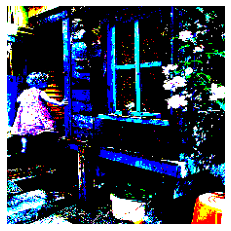

[[[[ -30.939003   -61.779      -67.68     ]
   [  13.060997     6.2210007  -17.68     ]
   [  34.060997    32.221        5.3199997]
   ...
   [ -99.939     -116.779     -118.68     ]
   [ -98.939     -111.779     -118.68     ]
   [-101.939     -108.779     -120.68     ]]

  [[ -36.939003   -68.779      -72.68     ]
   [  21.060997     9.221001   -13.68     ]
   [  38.060997    37.221        8.32     ]
   ...
   [ -94.939     -104.779     -113.68     ]
   [ -93.939     -108.779     -116.68     ]
   [ -90.939      -86.779     -102.68     ]]

  [[ -39.939003   -74.779      -76.68     ]
   [  26.060997    13.221001    -9.68     ]
   [  41.060997    36.221        6.3199997]
   ...
   [ -99.939     -107.779     -115.68     ]
   [-101.939     -107.779     -121.68     ]
   [ -95.939     -101.779     -123.68     ]]

  ...

  [[ -27.939003    56.221      107.32     ]
   [ -92.939      -49.779       20.32     ]
   [ -49.939003   -13.778999    35.32     ]
   ...
   [ 150.061      132.22101    126.

In [0]:
plt.imshow(img[0])
plt.axis('off')
plt.show()
print(img)

In [0]:
def encode_image(img):
    img = preprocess_img(img)
    feature_vector = model_new.predict(img)
    feature_vector = feature_vector.reshape((-1,))

    #print(feature_vector.shape)
    return feature_vector

In [0]:
encode_image(IMG_Path + "1000268201_693b08cb0e.jpg")

(2048,)


array([0.04154302, 0.17076056, 0.29278523, ..., 0.05089617, 0.31322402,
       0.8600748 ], dtype=float32)

Mapping All Image IDs to there feature vectors extracted from ResNet50 

In [0]:
from time import time 
start = time()
encoding_train = {}

for i,img_id in enumerate(train):
  img_path = IMG_Path + img_id + ".jpg"
  encoding_train[img_id] = encode_image(img_path)

  if i % 100 == 0:
    print("Encoding in progress Time Step %d"%(i)) 

end = time()
print("Total Time Taken : ",end-start)

Encoding in progress Time Step 0
Encoding in progress Time Step 100
Encoding in progress Time Step 200
Encoding in progress Time Step 300
Encoding in progress Time Step 400
Encoding in progress Time Step 500
Encoding in progress Time Step 600
Encoding in progress Time Step 700
Encoding in progress Time Step 800
Encoding in progress Time Step 900
Encoding in progress Time Step 1000
Encoding in progress Time Step 1100
Encoding in progress Time Step 1200
Encoding in progress Time Step 1300
Encoding in progress Time Step 1400
Encoding in progress Time Step 1500
Encoding in progress Time Step 1600
Encoding in progress Time Step 1700
Encoding in progress Time Step 1800
Encoding in progress Time Step 1900
Encoding in progress Time Step 2000
Encoding in progress Time Step 2100
Encoding in progress Time Step 2200
Encoding in progress Time Step 2300
Encoding in progress Time Step 2400
Encoding in progress Time Step 2500
Encoding in progress Time Step 2600
Encoding in progress Time Step 2700
Enco

In [0]:
# Storing Everything to the Disk
# In pickle format which will convert Python Object in RAM to a File in Disk (Serialization)
import pickle

with open("/content/drive/My Drive/Machine Learning/ImageCaptioningBot/encoded_train_features.pkl","wb") as f:
  pickle.dump(encoding_train,f)

In [0]:
start = time()
encoding_test = {}

for i,img_id in enumerate(test):
  img_path = IMG_Path + img_id + ".jpg"
  encoding_test[img_id] = encode_image(img_path)

  if i % 100 == 0:
    print("Test Encoding in progress Time Step %d"%(i)) 

end = time()
print("Total Time Taken(Test) : ",end-start)

Test Encoding in progress Time Step 0
Test Encoding in progress Time Step 100
Test Encoding in progress Time Step 200
Test Encoding in progress Time Step 300
Test Encoding in progress Time Step 400
Test Encoding in progress Time Step 500
Test Encoding in progress Time Step 600
Test Encoding in progress Time Step 700
Test Encoding in progress Time Step 800
Test Encoding in progress Time Step 900
Total Time Taken(Test) :  517.3899552822113


In [0]:
with open("/content/drive/My Drive/Machine Learning/ImageCaptioningBot/encoded_test_features.pkl","wb") as f:
  pickle.dump(encoding_test,f)

## Text Feature Extraction 

Preprocessing Captions by converting captions into Numeric Value

In [70]:
# Vocab
len(total_words)

1845

In [0]:
# Creating Mappings
word_to_idx = {}
idx_to_word = {}

for i,word in enumerate(total_words):
  word_to_idx[word] = i + 1
  idx_to_word[i + 1] = word

In [72]:
print(word_to_idx["dog"])
print(idx_to_word[1])

6
in


In [73]:
len(idx_to_word)

1845

In [74]:
# Adding Two special Words to our Vocab
idx_to_word[1846] = "startseq"
word_to_idx["startseq"] = 1846

idx_to_word[1847] = "endseq"
word_to_idx["endseq"] = 1847

vocab_size = len(word_to_idx) + 1
print("Vocab Size ",vocab_size)

Vocab Size  1848


In [75]:
# Finding the Max_length of Captions
max_len = 0

for key in train_descriptions.keys():
  for cap in train_descriptions[key]:
    max_len = max(max_len,len(cap.split()))
print(max_len)

35


## Data Generator(Loader)

In [0]:
import pickle
from keras.preprocessing.sequence import pad_sequences
from keras.utils import np_utils

In [0]:
with open("/content/drive/My Drive/Machine Learning/ImageCaptioningBot/encoded_train_features.pkl",'rb') as f:
  encoding_train = pickle.load(f)

In [0]:
# Generator remembers the state where the function was in the previous call

def Data_Generator(train_descriptions,encoding_train,word_to_idx,max_len,batch_size):

  X1,X2,y = [],[],[]

  n = 0
  while True:
    for key,desc_list in train_descriptions.items():
      n = n + 1
      photo = encoding_train[key]
      for desc in desc_list:
        seq = [word_to_idx[word] for word in desc.split() if word in word_to_idx]

        for i in range(1,len(seq)):
          xi = seq[0:i]
          yi = seq[i]

          # padding with 0
          # takes in a 2D input and pads 0s upto length = 35
          xi = pad_sequences([xi],maxlen=max_len,padding="post",value=0)[0]
          # gives an one hot vector 
          yi = np_utils.to_categorical([yi],num_classes = vocab_size)[0]

          X1.append(photo) # 2048 dims
          X2.append(xi) # 35 dims
          y.append(yi) # 1800 dims = vocab size

        if n == batch_size:
          yield [[np.array(X1),np.array(X2),],np.array(y)]

          # For the next function call when the control comes back to this generator function again
          # We will not add the examples that were there in the previous batch

          X1,X2,y = [],[],[]
          n = 0

In [79]:
encoding_train['3377117696_af91f13058']

array([3.6522949 , 0.42111346, 0.10406381, ..., 0.00557224, 0.        ,
       0.16518143], dtype=float32)

## Transfer Learning on Text using Glove Embedding

In [0]:
import numpy as np

In [0]:
f = open("/content/drive/My Drive/Machine Learning/ImageCaptioningBot/Data/Glove/glove.6B.50d.txt",encoding="utf8")

In [0]:
# Stores the word vector for every word
embedding_index = {}

for line in f:
  values = line.split()
  word = values[0]
  embedding_word = np.array(values[1:],dtype = "float")
  embedding_index[word] = embedding_word

In [0]:
f.close()

In [84]:
embedding_index['apple']

array([ 0.52042 , -0.8314  ,  0.49961 ,  1.2893  ,  0.1151  ,  0.057521,
       -1.3753  , -0.97313 ,  0.18346 ,  0.47672 , -0.15112 ,  0.35532 ,
        0.25912 , -0.77857 ,  0.52181 ,  0.47695 , -1.4251  ,  0.858   ,
        0.59821 , -1.0903  ,  0.33574 , -0.60891 ,  0.41742 ,  0.21569 ,
       -0.07417 , -0.5822  , -0.4502  ,  0.17253 ,  0.16448 , -0.38413 ,
        2.3283  , -0.66682 , -0.58181 ,  0.74389 ,  0.095015, -0.47865 ,
       -0.84591 ,  0.38704 ,  0.23693 , -1.5523  ,  0.64802 , -0.16521 ,
       -1.4719  , -0.16224 ,  0.79857 ,  0.97391 ,  0.40027 , -0.21912 ,
       -0.30938 ,  0.26581 ])

In [0]:
def get_embedding_matrix():
  emb_dim = 50
  matrix = np.zeros((vocab_size,emb_dim))

  for word,idx in word_to_idx.items():
    embedding_vector = embedding_index.get(word)

    if embedding_vector is not None:
      matrix[idx] = embedding_vector

  return matrix

In [86]:
embedding_matrix = get_embedding_matrix()
print(embedding_matrix.shape)

(1848, 50)


## Model Architecture

In [0]:
from keras.models import Model
from keras.layers import *

In [0]:
input_image_features = Input(shape = (2048,))
inp_img1 = Dropout(0.3)(input_image_features)
inp_img2 = Dense(256,activation="relu")(inp_img1)

In [0]:
input_captions = Input(shape = (max_len,))
inp_cap1 = Embedding(input_dim = vocab_size,output_dim = 50, mask_zero=True)(input_captions)
inp_cap2 = Dropout(0.3)(inp_cap1)
inp_cap3 = LSTM(256)(inp_cap2)

In [0]:
decoder1 = add([inp_img2,inp_cap3]) # adds two tensors
decoder2 = Dense(256,activation="relu")(decoder1)
outputs = Dense(vocab_size,activation="softmax")(decoder2)

In [0]:
model = Model(inputs=[input_image_features,input_captions],outputs = outputs)

In [92]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 35)           0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            (None, 2048)         0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 35, 50)       92400       input_4[0][0]                    
__________________________________________________________________________________________________
dropout_3 (Dropout)             (None, 2048)         0           input_3[0][0]                    
____________________________________________________________________________________________

In [0]:
model.layers[2].set_weights([embedding_matrix])
model.layers[2].trainable = False

In [0]:
model.compile(loss = "categorical_crossentropy", optimizer = "adam")

In [95]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 35)           0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            (None, 2048)         0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 35, 50)       92400       input_4[0][0]                    
__________________________________________________________________________________________________
dropout_3 (Dropout)             (None, 2048)         0           input_3[0][0]                    
____________________________________________________________________________________________

## Training the Model

In [0]:
epochs = 10 
# Number of images per batch
batch_size = 3
# How many times we want the generator to be called in 1 Epoch
steps = len(train_descriptions)//batch_size

def train():

  for i in range(epochs):
    # generator instance
    generator = Data_Generator(train_descriptions,encoding_train,word_to_idx,max_len,batch_size)
    model.fit_generator(generator,steps_per_epoch=steps,epochs=1,verbose=1)

    model.save("/content/drive/My Drive/Machine Learning/ImageCaptioningBot/model_weights/model_" + str(i) +'.h5')
    

In [97]:
train()

Epoch 1/1
2000/2000 [==============================] - 200s 100ms/step - loss: 4.2857
Epoch 1/1
2000/2000 [==============================] - 199s 100ms/step - loss: 3.5722
Epoch 1/1
2000/2000 [==============================] - 200s 100ms/step - loss: 3.3186
Epoch 1/1
2000/2000 [==============================] - 199s 99ms/step - loss: 3.1643
Epoch 1/1
2000/2000 [==============================] - 199s 100ms/step - loss: 3.0520
Epoch 1/1
2000/2000 [==============================] - 198s 99ms/step - loss: 2.9668
Epoch 1/1
2000/2000 [==============================] - 198s 99ms/step - loss: 2.8989
Epoch 1/1
2000/2000 [==============================] - 205s 103ms/step - loss: 2.8428
Epoch 1/1
2000/2000 [==============================] - 206s 103ms/step - loss: 2.7983
Epoch 1/1
2000/2000 [==============================] - 207s 103ms/step - loss: 2.7573


In [0]:
from keras.models import load_model

In [0]:
model = load_model("/content/drive/My Drive/Machine Learning/ImageCaptioningBot/model_weights/model_9.h5")

## Predictions

In [0]:
def predict_captions(photo):

  in_text = "startseq"
  for i in range(max_len):
    sequence = [word_to_idx[w] for w in in_text.split() if w in word_to_idx]
    sequence = pad_sequences([sequence],maxlen = max_len ,padding = "post")

    ypred = model.predict([photo,sequence])
    # Taking the word with max probablity - Greedy Sampling
    # Beam Search - Allows to pick top 3 words
    ypred = ypred.argmax()
    word = idx_to_word[ypred]
    in_text += (" " + word)

    if word == "endseq":
      break
  final_caption = in_text.split()[1:-1]
  final_caption = " ".join(final_caption)

  return final_caption


In [0]:
with open("/content/drive/My Drive/Machine Learning/ImageCaptioningBot/encoded_test_features.pkl",'rb') as f:
  encoding_test = pickle.load(f)

In [0]:
import matplotlib.pyplot as plt

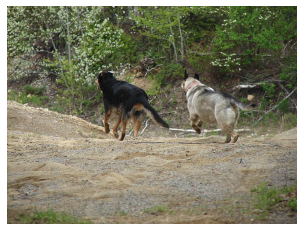

two dogs are running through the snow


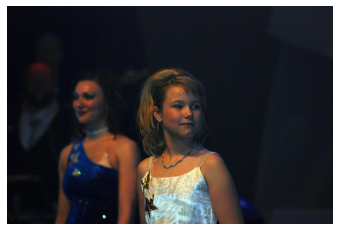

man in black shirt and black leather is standing in front of an audience


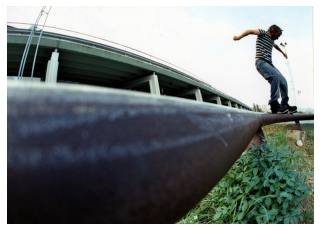

the skateboarder is wearing red shirt and black shirt


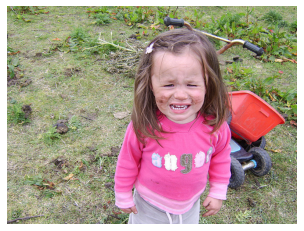

little boy in blue shirt and blue jeans is sitting on the grass


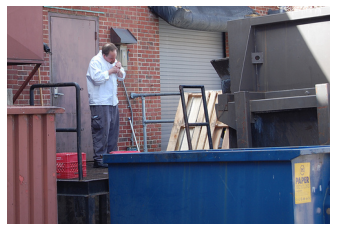

man in green shirt and black beard is sitting on the phone


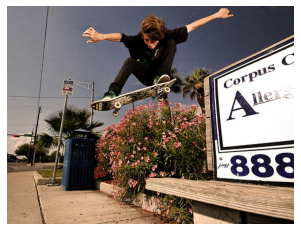

skateboarder in midair


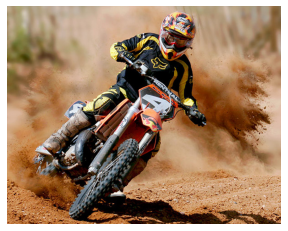

man on motorcycle is riding on dirt track


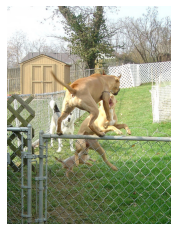

dog jumps over hurdle


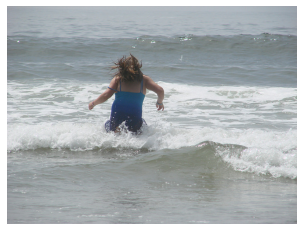

young girl in the ocean


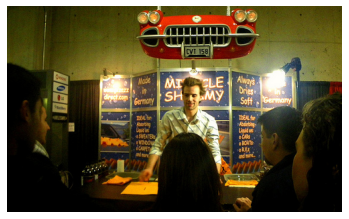

people are standing around of their hands


In [108]:
# Pick Some Random Images and See Results

for i in range(10):
  idx = np.random.randint(0,1000)
  all_img_names = list(encoding_test.keys())
  img_name = all_img_names[idx]
  # We will feed a batch of 1 image to our model 
  photo_2048 = encoding_test[img_name].reshape((1,2048))

  im = plt.imread("/content/drive/My Drive/Machine Learning/ImageCaptioningBot/Data/Images/" + img_name + ".jpg")
  plt.imshow(im)
  plt.axis("off")
  plt.show()
  caption = predict_captions(photo_2048)  
  print(caption)